In [1]:
%matplotlib inline 
import Calculate_ABA_Flinkelsteinlab as ABA
reload(ABA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

import seaborn as sns 
sns.set_style('ticks');
current_color = sns.color_palette();
sns.set_palette('Set2');

#import plotsettings 
#publishable = plotsettings.Set('Cell') 

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
#rcParams["patch.force_edgecolor"] = True

## Loadind data

In [3]:
Path = '../data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/'
filename_1 = 'cas9-target-e-replicate-1-delta-abas-processed.csv' 
filename_2 = 'cas9-target-d-replicate-1-delta-abas-processed.csv'
data_e = pd.read_csv(Path+filename_1)
data_d = pd.read_csv(Path+filename_2)

## Target e

 ### Single mismatches

In [12]:
single_MM_data_e = data_e[(data_e['MM_num']==1)&(data_e['Canonical PAM']==True)].copy()
single_MM_data_e = single_MM_data_e[['Mut_ID', 'Delta ABA (kBT)', 'Uncertainty']]
single_MM_data_e['MM_pos'] = single_MM_data_e['Mut_ID'].apply(lambda x: x.split(':')[1])
mean_single_MM_data_e = single_MM_data_e[['MM_pos','Delta ABA (kBT)','Uncertainty']].groupby('MM_pos').mean().reset_index()
mean_single_MM_data_e['MM_pos'] = mean_single_MM_data_e['MM_pos'].astype(int)
mean_single_MM_data_e.sort_values('MM_pos',inplace=True,ascending=False)

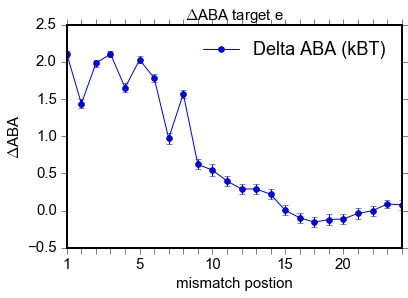

In [102]:
mean_single_MM_data_e.plot(x='MM_pos', y='Delta ABA (kBT)',yerr='Uncertainty', marker='o', linewidth=1, color='blue') 
plt.xticks([i for i in range(24)], 
           ['','','','',20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);
plt.xlabel('mismatch postion', fontsize=15)
plt.ylabel('$\Delta$ABA', fontsize=15)
plt.title('$\Delta$ABA '+'target e',fontsize=15)

### Double mismatches

In [19]:
double_MM_data_e = data_e[(data_e['Canonical PAM'] == True) & (data_e['MM_num'] == 2)].copy()
double_MM_data_e = double_MM_data_e[['Mut_ID', 'Delta ABA (kBT)', 'Uncertainty']]
double_MM_data_e['MM_pos'] = double_MM_data_e['Mut_ID'].apply(lambda x: ':'.join(map(lambda y: y.split(':')[1],x.split('|'))))
mean_double_MM_data_e = double_MM_data_e[['MM_pos','Delta ABA (kBT)','Uncertainty']].groupby('MM_pos').mean().reset_index()

In [25]:
L = 23
double_MM_map_e = np.empty((L,L))
double_MM_map_e[:] = np.nan
for i in range(0,L):
    for j in range(i+1,L):
        ID = str(i) + ':' + str(j)
        double_MM_map_e[j,i] = mean_double_MM_data_e[mean_double_MM_data_e['MM_pos']==ID]['Delta ABA (kBT)']


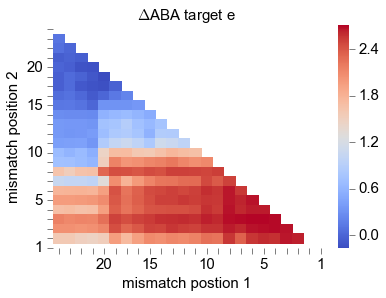

In [27]:
sns.heatmap(double_MM_map_e, cmap='coolwarm',cbar=True)
ax = plt.gca()
ax.xaxis.set_ticks_position('bottom')
plt.xticks([i+0.5 for i in range(24)], 
           ['','','','',20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);
plt.yticks([i+0.5 for i in range(24)], 
           ['','','','',20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);
plt.xlabel('mismatch postion 1', fontsize=15)
plt.ylabel('mismatch position 2', fontsize=15)
plt.title('$\Delta$ABA '+'target e',fontsize=15)

### Blocks of mismatches

In [46]:
def make_block_ID(x):
    MM_pos_array = np.array(map(int, map(lambda y: y.split(':')[1], x.split('|'))))
    bi = MM_pos_array[-1]
    bf = MM_pos_array[0]
    if len(MM_pos_array)!=len(np.arange(bf,bi+1)):
        return 'no block'
    if np.any(MM_pos_array == np.arange(bf,bi+1)):
        block_ID = str(bi) + ':' + str(bf)
    else:
        block_ID = 'no block'
    return(block_ID)

In [47]:
multi_MM_data_e = data_e[(data_e['Canonical PAM'] == True) & (data_e['MM_num'] > 2)].copy()
multi_MM_data_e = multi_MM_data_e[['Mut_ID', 'Delta ABA (kBT)', 'Uncertainty', 'MM_num']]
multi_MM_data_e['MM_num'] = multi_MM_data_e['MM_num'].astype(int)
multi_MM_data_e['Block_ID'] = multi_MM_data_e['Mut_ID'].apply(make_block_ID)
multi_MM_data_e = multi_MM_data_e[multi_MM_data_e['Block_ID']!='no block']
multi_MM_data_e.drop('Mut_ID', inplace=True, axis=1)
multi_MM_data_e = multi_MM_data_e[['Block_ID', 'MM_num', 'Delta ABA (kBT)', 'Uncertainty']]
mean_multi_MM_data_e = multi_MM_data_e.groupby('Block_ID').mean().reset_index()

In [48]:
block_MM_map_e = np.empty((L,L))
block_MM_map_e[:] = np.nan
ID_list = list(multi_MM_data_e['Block_ID'])
for i in range(0,L):
    for j in range(0,i):
        ID = str(i) + ':' + str(j)
        if ID in ID_list:
            block_MM_map_e[i,j] = mean_multi_MM_data_e[mean_multi_MM_data_e['Block_ID']==ID]['Delta ABA (kBT)']

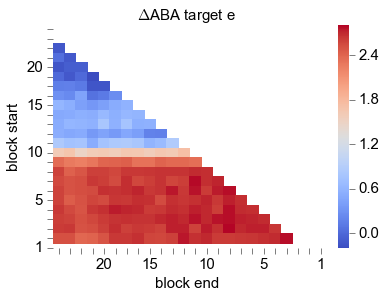

In [51]:
sns.heatmap(block_MM_map_e, cmap='coolwarm',cbar=True)
plt.xticks([i+0.5 for i in range(24)], 
           ['','','','',20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);
plt.yticks([i+0.5 for i in range(24)], 
           ['','','','',20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);
plt.xlabel('block end', fontsize=15)
plt.ylabel('block start', fontsize=15)
plt.title('$\Delta$ABA '+'target e',fontsize=15)

In [116]:
mean_multi_MM_data_e['Block_start'] = mean_multi_MM_data_e['Block_ID'].apply(lambda x: 24-int(x.split(':')[0]))
start_block_data_e = mean_multi_MM_data_e[['Block_start','Delta ABA (kBT)','Uncertainty']].groupby('Block_start').mean().reset_index()


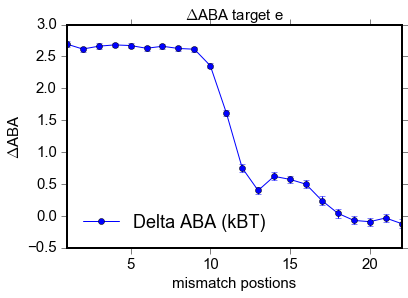

In [117]:
start_block_data_e.plot(x='Block_start', y='Delta ABA (kBT)',yerr='Uncertainty', marker='o', linewidth=1, color='blue') 
plt.xlabel('mismatch postions', fontsize=15)
plt.ylabel('$\Delta$ABA', fontsize=15)
plt.title('$\Delta$ABA '+'target e',fontsize=15)

## Compare with model

In [62]:
fit = pd.read_csv('../data/26_7_2018/fit_26_7_2018_sim_B.txt',delimiter='\t',index_col=45)
fit = fit.reset_index()

Nparams = 43
final_result = []
for param in range(1,Nparams+1):
    col = 'Parameter ' + str(param)
    final_result.append(fit[col].iloc[-1])

parameters = np.array(final_result)

In [63]:
concentrations = 2**np.array(range(0,11))*0.5
reference = 10.0
ontarget_ABA = ABA.calc_ABA(parameters, concentrations, reference, mismatch_positions=[], model_id = 'general_energies', guide_length = 20, T=10*60)

In [64]:
L = 20
double_MM_map_model = np.empty((L,L))
double_MM_map_model[:] = np.nan
for i in range(0,L):
    for j in range(i+1,L):
        mismatch_positions=[L-i,L-j]
        double_MM_map_model[j,i] = ABA.calc_delta_ABA(parameters, concentrations, reference, mismatch_positions,ontarget_ABA, 
                                                model_id = 'general_energies', guide_length = 20, T=10*60)

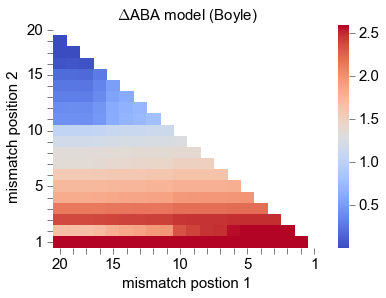

In [67]:
sns.heatmap(double_MM_map_model, cmap='coolwarm',cbar=True,vmax=2.6)
ax = plt.gca()
ax.xaxis.set_ticks_position('bottom')
plt.xticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);
plt.yticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);
plt.xlabel('mismatch postion 1', fontsize=15)
plt.ylabel('mismatch position 2', fontsize=15)
plt.title('$\Delta$ABA '+'model (Boyle)',fontsize=15)

In [85]:
combined_double_MM_map = np.nan_to_num(double_MM_map_e[:-3,:-3]).T+np.nan_to_num(double_MM_map_model)
nan_array = np.empty(L)
nan_array[:] = np.nan
combined_double_MM_map += np.diag(nan_array)

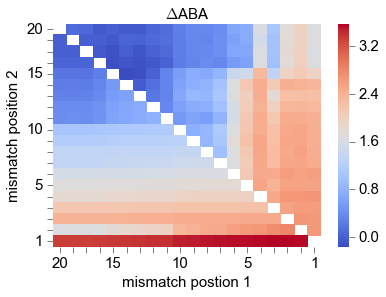

In [86]:
sns.heatmap(combined_double_MM_map
            , cmap='coolwarm',cbar=True)
ax = plt.gca()
ax.xaxis.set_ticks_position('bottom')
plt.xticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);
plt.yticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);
plt.xlabel('mismatch postion 1', fontsize=15)
plt.ylabel('mismatch position 2', fontsize=15)
plt.title('$\Delta$ABA',fontsize=15)

In [92]:
block_MM_map_model = np.empty((L,L))
block_MM_map_model[:] = np.nan
for i in range(0,L):
    for j in range(0,i):
        mismatch_positions = range(L-i,L-j)
        block_MM_map_model[i,j] = ABA.calc_delta_ABA(parameters, concentrations, reference, mismatch_positions,ontarget_ABA, 
                                                model_id = 'general_energies', guide_length = 20, T=10*60)
        

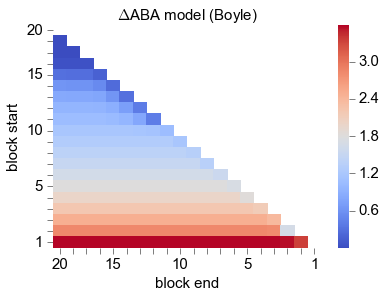

In [93]:
sns.heatmap(block_MM_map_model, cmap='coolwarm',cbar=True)
plt.xticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);
plt.yticks([i+0.5 for i in range(20)], 
           [20,'','','',15,'','','','',10,'','','','',5,'','','','',1], rotation=0);
plt.xlabel('block end', fontsize=15)
plt.ylabel('block start', fontsize=15)
plt.title('$\Delta$ABA '+'model (Boyle)',fontsize=15)

In [113]:
def find_free_energy(parameters, mismatch_positions, model_id='general_energies',guide_length=20):
    epsilon, _ = ABA.unpack_parameters(parameters, model_id,guide_length)
    energies = ABA.get_energies(epsilon,mismatch_positions, guide_length)
    sum_energies =np.cumsum(energies)
    return -np.log(np.sum(np.exp(-sum_energies)))

In [123]:
start_block_data_model = pd.DataFrame()
start_block_data_model['Block_start'] = np.arange(0,L)
aba_list=[]
free_energy_list =[]
OT_free_energy = find_free_energy(parameters, mismatch_positions=[], model_id='general_energies',guide_length=20)
for i in range(1,L+1):
    mismatch_positions = range(i,L)
    aba = ABA.calc_delta_ABA(parameters, concentrations, reference, mismatch_positions,ontarget_ABA, 
                                                model_id = 'general_energies', guide_length = 20, T=10*60)
    free_energy = find_free_energy(parameters, mismatch_positions, 
                                   model_id='general_energies',guide_length=20)-OT_free_energy
    aba_list.append(aba)
    free_energy_list.append(free_energy)
start_block_data_model['Delta ABA (kBT)'] = np.array(aba_list)
start_block_data_model['Delta Free Energy (kBT)'] = np.array(free_energy_list)

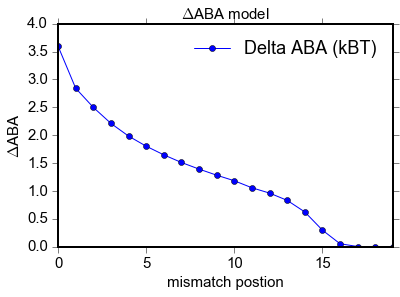

In [124]:
start_block_data_model.plot(x='Block_start', y='Delta ABA (kBT)', marker='o', linewidth=1, color='blue') 
plt.xlabel('mismatch postion', fontsize=15)
plt.ylabel('$\Delta$ABA', fontsize=15)
plt.title('$\Delta$ABA '+'model',fontsize=15)

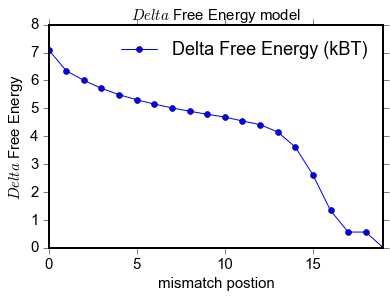

In [125]:
start_block_data_model.plot(x='Block_start', y='Delta Free Energy (kBT)', marker='o', linewidth=1, color='blue') 
plt.xlabel('mismatch postion', fontsize=15)
plt.ylabel('$Delta$ Free Energy', fontsize=15)
plt.title('$Delta$ Free Energy '+'model',fontsize=15)